# Interpreting Models in H2O-3

In this tutorial, we will walk through how to use H2O-3 to interpret models. The dataset used in this tutorial is synthetic dataset used to mimic employee attrition. It can be found here <https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset>.

**Steps**
1. Data Exploration
2. Building Models
3. Interpreting Model
4. Using Surrogate Models

## Step 1: Data Exploration


We will begin by exploring our data and using H2O-3 to visualize the dataset.

We can use H2O-3 to generate statistics and run correlations.  Since H2O-3 is scalable, this can be run on very large datasets.

In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.2" 2019-07-16; Java(TM) SE Runtime Environment (build 12.0.2+10); Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from /Users/megankurka/env2/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/fk/z2fjbsq163scfcsq9fhsw7r00000gn/T/tmpk1fglenw
  JVM stdout: /var/folders/fk/z2fjbsq163scfcsq9fhsw7r00000gn/T/tmpk1fglenw/h2o_megankurka_started_from_python.out
  JVM stderr: /var/folders/fk/z2fjbsq163scfcsq9fhsw7r00000gn/T/tmpk1fglenw/h2o_megankurka_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_megankurka_lvi70v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [2]:
employees = h2o.import_file("../../../../Data/EmployeeChurn/WA_Fn-UseC_-HR-Employee-Attrition.csv")
employees.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [3]:
employees["Attrition"].table()

Attrition,Count
No,1233
Yes,237


We can use the correlation function to calculate the correlations between our numeric columns and attrition.

We can see the features with the greatest correlation are: 

* Total Working Years
* Job Level
* Years in Current Role
* Monthly Income
* Age

These are all negatively corrleated with Attrition.

In [4]:
num_cols = [k for k,v in employees.types.items() if v in ["real", "int"]]
attrition_cor = employees["Attrition"].cor(employees[num_cols], na_rm = True)
attrition_cor = attrition_cor.as_data_frame(use_pandas = True).transpose()
attrition_cor.reindex(attrition_cor[0].abs().sort_values(ascending=False).index).head()

,0
TotalWorkingYears,-0.171063
JobLevel,-0.169105
YearsInCurrentRole,-0.160545
MonthlyIncome,-0.159840
Age,-0.159205


## Step 2: Building Models

We will use AutoML to perform automatic grid search and algorithm selection on this dataset.  Our goal is to find the model that is most accurate in predicting employee attrition.

In [5]:
train, test = employees.split_frame(seed=1234)

In [6]:
from h2o.automl import H2OAutoML

# We will drop columns that are redundant or constant 
x = list(set(employees.col_names) - set(["EmployeeCount", "EmployeeNumber", 
                                         "HourlyRate", "DailyRate", "MonthlyRate", 
                                         "Attrition"]))

automl = H2OAutoML(project_name="employees", 
                   max_models=10, # small for demo purposes
                   max_runtime_secs=300,
                   sort_metric="AUCPR",
                   exclude_algos=["StackedEnsemble"],
                   seed = 1234
                  )
automl.train(training_frame=train, leaderboard_frame=test, y="Attrition", x=x)


AutoML progress: |████████████████████████████████████████████████████████| 100%


In [7]:
lb = automl.leaderboard
lb

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
GLM_1_AutoML_20200727_090043,0.574607,0.852271,0.308598,0.201996,0.303525,0.0921276
XGBoost_2_AutoML_20200727_090043,0.552762,0.845979,0.319147,0.236965,0.309772,0.0959587
GBM_4_AutoML_20200727_090043,0.520013,0.843162,0.318781,0.213502,0.313665,0.0983855
XGBoost_3_AutoML_20200727_090043,0.496087,0.829318,0.330397,0.245955,0.318797,0.101631
GBM_1_AutoML_20200727_090043,0.484683,0.822186,0.33326,0.265642,0.319637,0.102168
XGBoost_1_AutoML_20200727_090043,0.475817,0.819789,0.351827,0.27607,0.326489,0.106595
GBM_3_AutoML_20200727_090043,0.446645,0.796716,0.353646,0.244067,0.330408,0.10917
GBM_5_AutoML_20200727_090043,0.439277,0.814096,0.342088,0.262136,0.323761,0.104821
DRF_1_AutoML_20200727_090043,0.430948,0.812088,0.341971,0.260967,0.325302,0.105821
GBM_2_AutoML_20200727_090043,0.410392,0.804147,0.356123,0.268878,0.33164,0.109985


Our best model is a linear model. This is often the case for very small data (like we have) or imbalanced data because GLM models are less likely to overfit.

A linear model is fully explainable since it provides us with coefficients for each feature.  The coefficients for our leader model are shown below:

/Users/megankurka/env2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


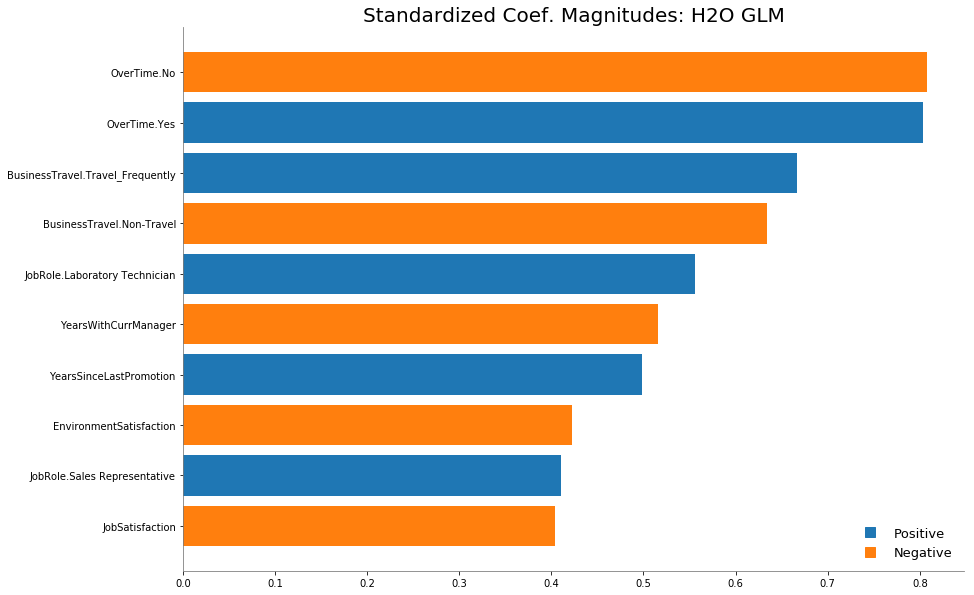

In [8]:
%matplotlib inline
automl.leader.std_coef_plot(num_of_features=10)

We will also examine the top non-linear model using our model interpretability techniques.  

Note: In general, non-linear models, like Gradient Boosting Machines, tend to be more accurate.  Since they are non-linear, however, they are not as easy to interpret.  We will spend the rest of the tutorial showing how to interpret these types of models.

In [10]:
model_idx = [i for i in lb.as_data_frame()["model_id"] if "GLM" not in i][0]
lb[lb["model_id"] == model_idx]

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20200727_090043,0.552762,0.845979,0.319147,0.236965,0.309772,0.0959587


In [11]:
model = h2o.get_model(model_idx)

## Step 3: Interpret our Model

### Global Interpretation

For our GBM model, we first look at the most important variables in the model and how those variables affect the Attrition prediction.

The most important features are `MonthlyIncome`, `JobRole`, and `OverTime`.

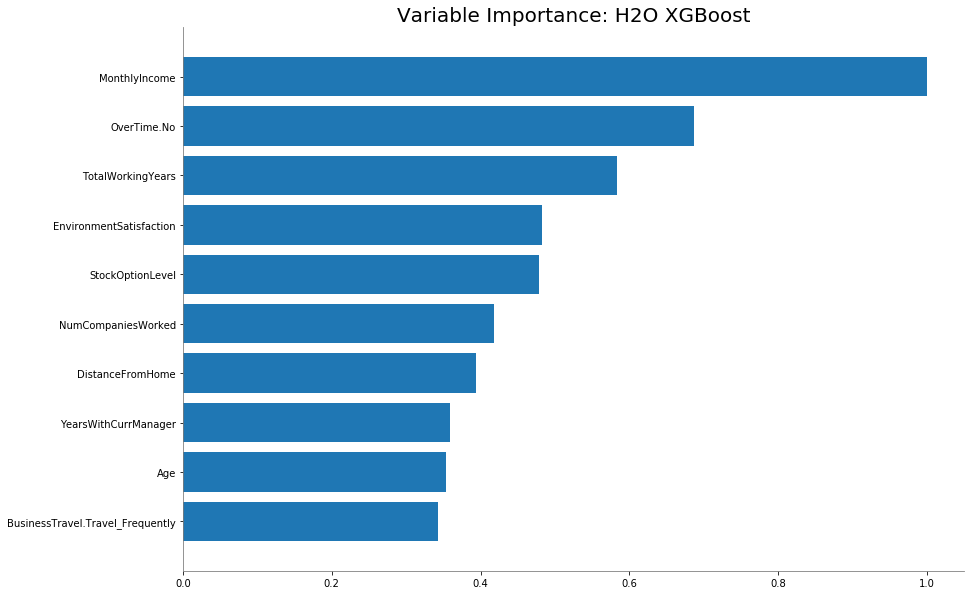

In [12]:
model.varimp_plot()

We will use partial dependence plots to examine how these top features affect the prediction.

#### Monthly Income

We can see that when monthly income is below a certain threshold, attrition likelihood increases. Otherwise monthly income has no real affect.

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


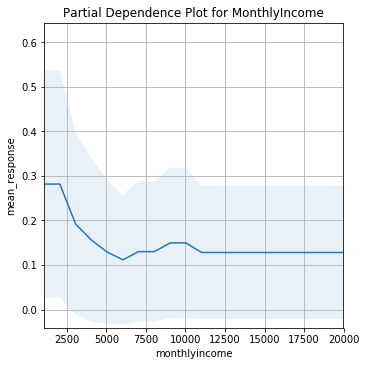

In [13]:
model.partial_plot(test, cols=["MonthlyIncome"], figsize=(5, 5));

Note: The partial dependence plots, by default, calculate bins by range.  If there is an outlier in the column, there may be many bins that do not occur in the original dataset.  If that is the case, you can instead pass your own bins to the partial dependence plot based on quantiles as shown below.

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


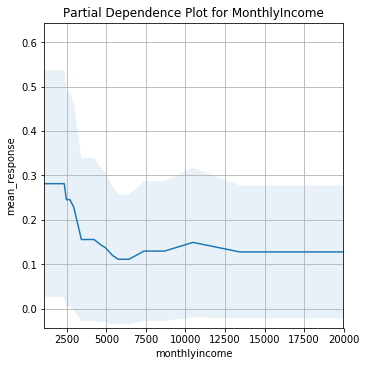

In [14]:
import numpy as np
quantiles = list(np.linspace(0,1,20))
bins = test["MonthlyIncome"].quantile(prob=quantiles).as_data_frame().iloc[:, 1].values
model.partial_plot(test, cols=["MonthlyIncome"], user_splits={'MonthlyIncome': bins}, figsize=(5, 5));

#### Job Role

The partial dependence frame is shown instead of the plot since there are many unique Job Roles in the dataset. 

The results show us that Job Roles in Sales (Sales Executive, Sales Representative) have high likelihood of attrition.

In [15]:
jobrole_pdp = model.partial_plot(employees, cols = ["JobRole"], plot=False)
jobrole_pdp[0]

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model XGBoost_2_AutoML_20200727_090043 on column 'JobRole'.


,jobrole,mean_response,stddev_response,std_error_mean_response
0,Healthcare Representative,0.166693,0.219076,0.005714
1,Human Resources,0.166693,0.219076,0.005714
2,Laboratory Technician,0.207678,0.241190,0.006291
3,Manager,0.166693,0.219076,0.005714
4,Manufacturing Director,0.166693,0.219076,0.005714
5,Research Director,0.166693,0.219076,0.005714
6,Research Scientist,0.126600,0.187052,0.004879
7,Sales Executive,0.184158,0.226170,0.005899
8,Sales Representative,0.166693,0.219076,0.005714


#### Over Time

The partial dependence plot shows us that employees who work over time are more likely to quit.

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


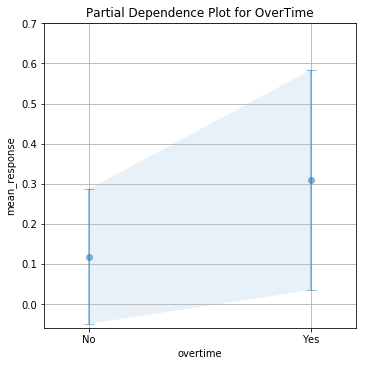

In [16]:
model.partial_plot(employees, cols = ["OverTime"], figsize=(5, 5));

### Local Interpretation

Now we will use Shapley contributions to generate reason codes around why the model predicted if a specific employee will quit.  To learn more about Shapley, see the tutorial here: <https://christophm.github.io/interpretable-ml-book/shapley.html>.

The function `predict_contributions` returns the Shapley reason codes for each record in the frame.

In [17]:
shapley_contribs = model.predict_contributions(employees)
shapley_contribs = employees["Attrition"].cbind(shapley_contribs)
shapley_contribs.head()

contributions progress: |█████████████████████████████████████████████████| 100%


Attrition,JobRole.Healthcare Representative,JobRole.Human Resources,JobRole.Laboratory Technician,JobRole.Manager,JobRole.Manufacturing Director,JobRole.Research Director,JobRole.Research Scientist,JobRole.Sales Executive,JobRole.Sales Representative,JobRole.missing(NA),EducationField.Human Resources,EducationField.Life Sciences,EducationField.Marketing,EducationField.Medical,EducationField.Other,EducationField.Technical Degree,EducationField.missing(NA),BusinessTravel.Non-Travel,BusinessTravel.Travel_Frequently,BusinessTravel.Travel_Rarely,BusinessTravel.missing(NA),Department.Human Resources,Department.Research & Development,Department.Sales,Department.missing(NA),MaritalStatus.Divorced,MaritalStatus.Married,MaritalStatus.Single,MaritalStatus.missing(NA),Gender.Female,Gender.Male,Gender.missing(NA),OverTime.No,OverTime.Yes,OverTime.missing(NA),Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BiasTerm
Yes,0,0,-0.0794655,0,0,0,0.104727,0.186701,0,0,0,-0.0185434,0,0.0532431,0,0,0,0,-0.174102,0.0573097,0,0,0.289686,0.217717,0,0,-0.0296826,0.0869984,0,-0.0214033,-0.18118,0,0.723728,0.520283,0,-0.279465,-0.240899,-0.103128,0.109372,-0.127089,-0.136337,-0.325215,-0.567011,0.991835,0.193416,0,0.32969,0.496269,0.129084,0.236829,0.263151,0.024721,-0.0996554,-0.174103,-0.0852658,-1.79859
No,0,0,-0.101566,0,0,0,-0.278601,-0.0594984,0,0,0,-0.0176239,0,0.0337466,0,0,0,0,0.94741,-0.0278572,0,0,-0.184894,-0.0858057,0,0,0.100855,-0.128656,0,0.0353485,0.0703959,0,-0.308822,-0.152817,0,-0.156793,-0.125256,-0.103128,-0.288417,0.270264,-0.139985,0.0345894,-0.588734,-0.351639,-0.278681,0,-0.000336561,-0.515068,-0.210188,-0.158287,-0.136335,0.100264,-0.0112721,-0.25107,-0.169179,-1.79859
Yes,0,0,0.365111,0,0,0,0.0624533,-0.0323858,0,0,0,0.0138904,0,0.0337466,0,0,0,0,-0.179474,0.0573097,0,0,-0.179854,-0.069442,0,0,-0.0227881,0.189848,0,0.020447,0.132475,0,0.815001,0.416736,0,-0.211145,-0.316697,-0.0581327,-0.380382,0.100984,0.185218,-0.126374,0.965131,0.834705,0.28444,0,-0.0501605,0.499399,0.11847,-0.201235,-0.186186,0.0200566,0.0943474,-0.114737,0.408206,-1.79859
No,0,0,-0.0830775,0,0,0,-0.321955,-0.0260981,0,0,0,-0.0140579,0,0.0337466,0,0,0,0,0.907222,-0.0278572,0,0,-0.149851,-0.0526375,0,0,0.0355095,-0.165598,0,-0.0253045,-0.115092,0,1.03566,0.47034,0,0.244878,-0.299298,0.0452867,-0.331876,-0.0743991,0.107821,-0.0728041,0.5653,-0.303739,0.240239,0,-0.141808,0.393285,0.0234095,-0.280682,-0.11555,0.136237,-0.0786877,0.285443,0.427008,-1.79859
No,0,0,0.293096,0,0,0,0.0929443,-0.0137842,0,0,0,0.0374603,0,-0.0724486,0,0,0,0,-0.208847,0.0573097,0,0,-0.154286,-0.0337437,0,0,0.100855,-0.0947342,0,0.0618517,0.0515476,0,-0.345372,-0.213412,0,0.297743,-0.290709,-0.107868,0.995021,-0.0368894,0.100912,0.0761967,-0.0691798,1.06381,0.0614893,0,-0.0571696,-0.483251,0.0487682,-0.246032,-0.141918,-0.0520315,0.0051572,0.0348303,-0.221794,-1.79859
No,0,0,0.270957,0,0,0,0.0981659,-0.0338708,0,0,0,-0.0313431,0,0.0337466,0,0,0,0,0.846251,-0.0278572,0,0,-0.178886,-0.0347187,0,0,-0.0227881,0.198411,0,0.0353485,0.07373,0,-0.451398,-0.234237,0,0.121304,-0.193832,-0.103128,-0.463761,-0.0997251,0.178321,-0.597831,0.348631,-0.377517,-0.0357794,0,-0.1283,0.415635,-0.102381,0.205027,0.333487,0.0477157,-0.0692048,0.207728,-0.135931,-1.79859
No,0,0,0.365111,0,0,0,0.095097,-0.0246728,0,0,0,0.00858229,0,-0.0330699,0,0,0,0,-0.222389,0.0573097,0,0,-0.148286,-0.0438907,0,0,0.0355095,-0.160719,0,-0.0214033,-0.137531,0,0.528159,0.270903,0,-0.447007,-0.316592,0.0255279,-0.293448,-0.0559198,0.147517,0.504948,0.666404,0.0812495,-0.203338,0,0.334534,-0.427865,-0.0440478,-0.201235,0.312701,0.0360987,0.0944019,-0.102939,0.530471,-1.79859
No,0,0,0.355708,0,0,0,0.0882655,-0.0690965,0,0,0,-0.0156907,0,0.0337

We use the shap library to examine the reason codes.

In [18]:
import shap
# load JS visualization code to notebook
shap.initjs()

Our first function analyzes individual reason codes.  If we look at a selected employee in our dataset, we can see that they have a higher likelihood of attrition mostly because they work over time.

In [20]:
def examine_indiv_reason_codes(record, model, use_matplotlib=True):
    
    shap_contribs = model.predict_contributions(record)
    
    col_mapping = {}
    for i in record.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = record.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.force_plot(bias_term, 
                           shap_contribs[shap_cols].values, 
                           X[shap_cols].values, 
                           shap_cols,
                           link="logit",
                           matplotlib=use_matplotlib
                          )
    

contributions progress: |█████████████████████████████████████████████████| 100%


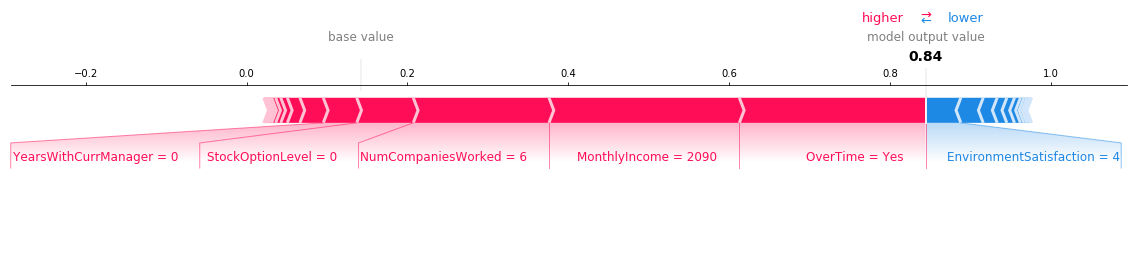

In [21]:
examine_indiv_reason_codes(employees[2, :], model)

We can use ICE (Individual Conditional Expectation plots) to see how only the individual is affected by a change in their attributes.  This is the same as a partial dependence plot run on a single record.

Below we examine the partial dependence plot of Monthly Income on the whole dataset vs our selected record.  Our selected employee, has a much larger increase in probability with lower monthly income than the dataset does as a whole.

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependencePlot progress: |█████████████████████████████████████████| 100%


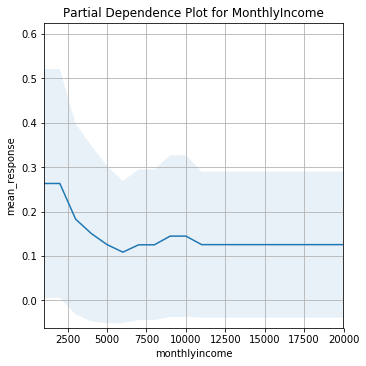

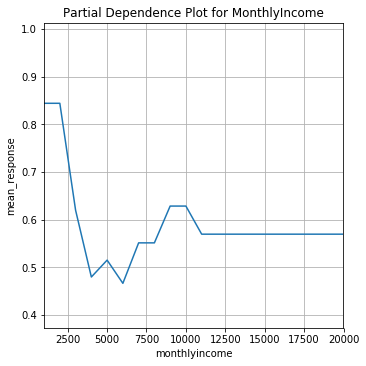

In [22]:
model.partial_plot(employees, cols = ["MonthlyIncome"], figsize=(5, 5));
model.partial_plot(employees, cols = ["MonthlyIncome"], figsize=(5, 5), row_index=2);

We can use the shap package to examine all the reason codes on a single plot.  The graph shows the affect of high or low values of a feature on the prediction.  

The graph shows us that there are clusters of employees with low monthly income values, low stock option level, and low environment satisfaction and these all increase the attrition prediction.

In [26]:
def examine_all_reason_codes(data, model):
    
    shap_contribs = model.predict_contributions(data)
    
    col_mapping = {}
    for i in data.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.summary_plot(shap_contribs[shap_cols].values, 
                             X[shap_cols].values,
                             feature_names=shap_cols
                            )

In [ ]:
examine_all_reason_codes(employees, model)

contributions progress: |█████████████████████████████████████████████████| 100%


## Step 4: Using Surrogate Models


Now we can build a surrogate decision tree model to explain, at a high level, how our model is predicting Attrition.

The idea behind surrogate models is to use a simpler model to explain a more complex one.  In this case, we will build a simple decision tree to predict the Attrition probability.  This simple decision tree will show us segments of the data where the model is likely to predict Attrition.

To train the decision tree, we first add the Attrition probability to our dataset (this will be the decision tree's target column).

In [139]:
surrogate_dt_data = model.predict(employees).cbind(employees)
surrogate_dt_data.head()

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,No,Yes,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Yes,0.360401,0.639599,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
No,0.993544,0.00645627,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
Yes,0.155725,0.844275,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
Yes,0.384044,0.615956,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
No,0.779554,0.220446,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
No,0.846398,0.153602,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
Yes,0.643002,0.356998,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
No,0.800323,0.199677,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
No,0.9679,0.0320996,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
No,0.929763,0.0702373,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


Now we train a decision tree with depth of 3 to visualize.

In [205]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

dt = H2ORandomForestEstimator(model_id="surrogate.hex",
                              ntrees=1, max_depth=3,
                              sample_rate=1,
                              categorical_encoding="one_hot_explicit",
                              mtries=27,
                              min_rows=20 # use min rows to prevent small leaf nodes and fitting noise
                             )
dt.train(y="Yes", training_frame=surrogate_dt_data, x=x)

Dropping bad and constant columns: [StandardHours, Over18]
Sample rate is 100% and no validation dataset and no cross-validation. There are no out-of-bag data to compute error estimates on the training data!


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [206]:
import os
import subprocess
from IPython.display import Image
def generateTreeImage(model, tree_number):
    # Download MOJO
    mojo_path = model.download_mojo(get_genmodel_jar=True)
    directory = os.path.dirname(mojo_path)
    h2o_jar_path = os.path.join(directory, "h2o-genmodel.jar")
    # Create Graphviz file
    gv_file_path = os.path.join(directory, "decision_tree.gv")
    gv_call = " ".join(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_number), "-i", mojo_path , "-o", gv_file_path])
    result = subprocess.call(gv_call, shell=True)
    result = subprocess.call(["ls", gv_file_path], shell = False)
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o decision_tree.png"], shell=False)
    result = subprocess.call(["ls","decision_tree.png"], shell = False)
    
    return Image(" decision_tree.png")

The decision tree shows us that the segment with hte highest probability of attrition is: 

* employees who make less than $3k a month
* employees who work over time
* employees who have worked less than 2.5 years at their current company

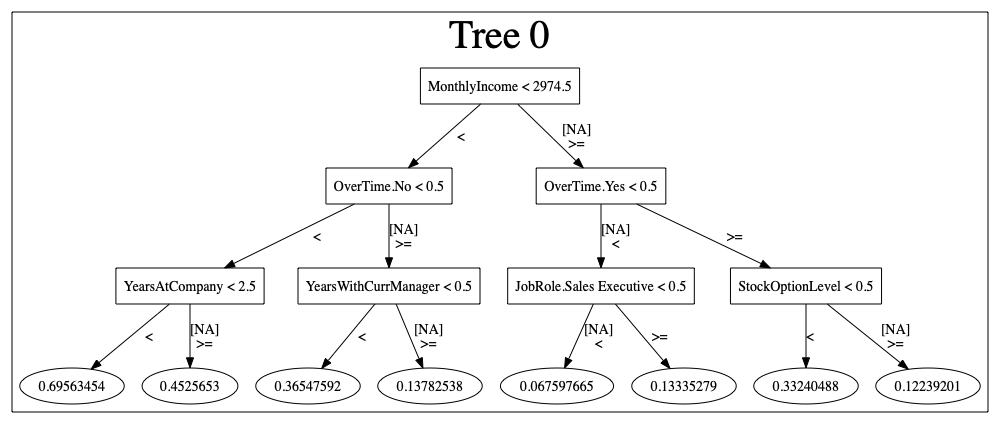

In [207]:
generateTreeImage(dt, 0)

We can format this decision tree as a series of rules by using the helper functions below.

In [208]:
from h2o.tree import H2OTree

def get_rules(dt):
    """
    Extract rules from decision tree
    """
    rules = {}
    preds = dt.predict(employees).cbind(dt.predict_leaf_node_assignment(employees))
    preds = preds.group_by(["T1"]).mean(["predict"]).get_frame().as_data_frame()
    node = H2OTree(dt, 0).root_node
    
    for i in range(len(preds)):
        rules[i] = {'prediction': preds.iloc[i]["mean_predict"],
                   'rule': _tree_traverser(node, preds.iloc[i]["T1"])}
        
    return rules
    

def _tree_traverser(node, split_path):
    """
    Traverse the tree to get the rules for a specific split_path
    """
    rule = []
    splits = [char for char in split_path]
    for i in splits:
        if i == "R":
            if np.isnan(node.threshold):
                rule = rule + [{'split_feature': node.split_feature, 
                                'value': node.right_levels, 
                                'operator': 'in'}]
            else:
                rule = rule + [{'split_feature': node.split_feature, 
                                'value': node.threshold, 
                                'operator': '>='}]

            node = node.right_child
        if i == "L":
            if np.isnan(node.threshold):
                rule = rule + [{'split_feature': node.split_feature, 
                                'value': node.left_levels, 
                                'operator': 'in'}]

            else:
                rule = rule + [{'split_feature': node.split_feature, 
                                'value': node.threshold, 
                                'operator': '<'}]

            node = node.left_child
    consolidated_rules = _consolidate_rules(rule)
    consolidated_rules = " AND ".join(consolidated_rules.values())
    return consolidated_rules

def _consolidate_rules(rules):
    """
    Consolidate rules
    """
    rules = [x for x in rules if x.get("value")]
    features = set([x.get('split_feature') for x in rules])
    consolidated_rules = {}
    for i in features:
        feature_rules = [x for x in rules if x.get('split_feature') == i]
        if feature_rules[0].get('operator') == 'in':
            cleaned_rules = i + " is in " + ", ".join(sum([x.get('value') for x in feature_rules], []))
        else:
            cleaned_rules = []
            operators = set([x.get('operator') for x in feature_rules])
            for op in operators:
                vals = [x.get('value') for x in feature_rules if x.get('operator') == op]
                if '>' in op:
                    constraint = max(vals)
                else:
                    constraint = min(vals)
                cleaned_rules = " and ".join([op + " " + str(round(constraint, 3))])
                cleaned_rules = i + " " + cleaned_rules
        consolidated_rules[i] = cleaned_rules
    
    return consolidated_rules

In [209]:
surrogate_rules = get_rules(dt)

for v in surrogate_rules.values():
    print("Prediction: {:.2f}".format(v.get("prediction")))
    print("Rule: {}\n".format(v.get("rule")))

drf prediction progress: |████████████████████████████████████████████████| 100%
Prediction: 0.70
Rule: YearsAtCompany < 2.5 AND OverTime.No < 0.5 AND MonthlyIncome < 2974.5

Prediction: 0.45
Rule: YearsAtCompany >= 2.5 AND OverTime.No < 0.5 AND MonthlyIncome < 2974.5

Prediction: 0.37
Rule: OverTime.No >= 0.5 AND YearsWithCurrManager < 0.5 AND MonthlyIncome < 2974.5

Prediction: 0.14
Rule: OverTime.No >= 0.5 AND YearsWithCurrManager >= 0.5 AND MonthlyIncome < 2974.5

Prediction: 0.07
Rule: JobRole.Sales Executive < 0.5 AND MonthlyIncome >= 2974.5 AND OverTime.Yes < 0.5

Prediction: 0.13
Rule: JobRole.Sales Executive >= 0.5 AND MonthlyIncome >= 2974.5 AND OverTime.Yes < 0.5

Prediction: 0.33
Rule: StockOptionLevel < 0.5 AND MonthlyIncome >= 2974.5 AND OverTime.Yes >= 0.5

Prediction: 0.12
Rule: StockOptionLevel >= 0.5 AND MonthlyIncome >= 2974.5 AND OverTime.Yes >= 0.5



### Surrogate Models for Residual Analysis

We are not limited to using surrogate models to explain the model prediction.  We can also use it to explain where the model has high error.  This gives us an idea of where we may have low confidence in the model.

In [214]:
surrogate_dt_data["error"] = surrogate_dt_data["predict"] != surrogate_dt_data["Attrition"]

residual_dt = H2ORandomForestEstimator(model_id="residual_surrogate.hex",
                                       ntrees=1, max_depth=3,
                                       sample_rate=1,
                                       categorical_encoding="one_hot_explicit",
                                       mtries=27,
                                       min_rows=20 # use min rows to prevent small leaf nodes and fitting noise
                                      )
residual_dt.train(y="error", training_frame=surrogate_dt_data, x=x)

Dropping bad and constant columns: [StandardHours, Over18]
Sample rate is 100% and no validation dataset and no cross-validation. There are no out-of-bag data to compute error estimates on the training data!


drf Model Build progress: |███████████████████████████████████████████████| 100%


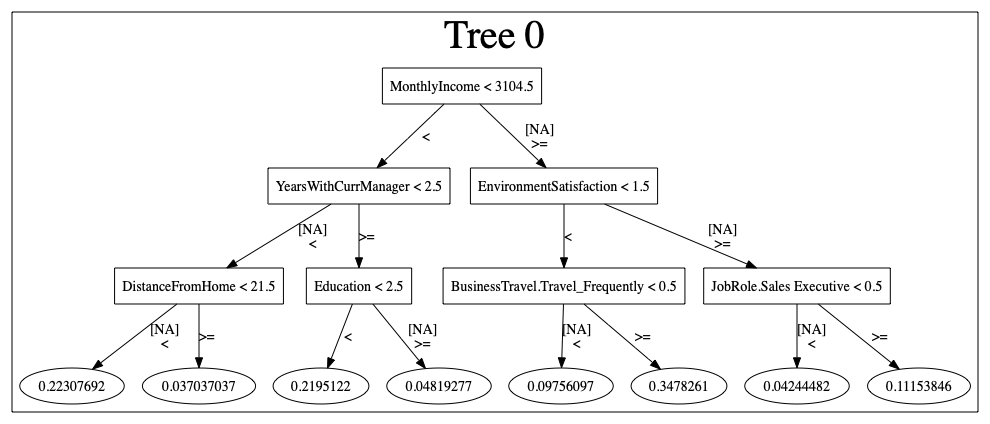

In [215]:
generateTreeImage(residual_dt, 0)

We can examine the number of records per segment and count of errors below.

In [222]:
residual_preds = surrogate_dt_data["error"].cbind(residual_dt.predict_leaf_node_assignment(surrogate_dt_data))
residual_dt_segments = residual_preds.group_by("T1").count().sum("error").get_frame()
residual_dt_segments["error_rate"] = residual_dt_segments["sum_error"]/residual_dt_segments["nrow"]
residual_dt_segments

T1,nrow,sum_error,error_rate
LLL,260,58,0.223077
LLR,27,1,0.037037
LRL,41,9,0.219512
LRR,83,4,0.0481928
RLL,164,16,0.097561
RLR,46,16,0.347826
RRL,589,25,0.0424448
RRR,260,29,0.111538


From the results of the model, it does not seem like we have any segment with unusually high error rate where we would expect low confidence in the model.

In [223]:
h2o.cluster().shutdown()

H2O session _sid_9d04 closed.
